# DBSCAN Clustering — From Zero to Complete Understanding

This notebook implements **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** step by step.

We will:
- Generate data
- Scale it correctly
- Choose epsilon using k-distance graph
- Apply DBSCAN
- Analyze clusters, noise, core and border points
- Test parameter sensitivity


## Step 1: Import Essential Libraries

Purpose of each import:

- **numpy** → numerical operations  
- **matplotlib** → data visualization  
- **DBSCAN** → clustering algorithm  
- **make_blobs** → synthetic dataset creation  
- **StandardScaler** → feature scaling (mandatory for DBSCAN)  
- **NearestNeighbors** → epsilon (ε) selection using k-distance graph


In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


## Step 2: Create a Synthetic Dataset

We generate a **2D dataset** so clustering can be visualized.

Parameters:
- `n_samples` → total number of points
- `centers` → number of true clusters (only for data generation)
- `cluster_std` → spread of clusters
- `_` → labels ignored (DBSCAN is unsupervised)


In [12]:
X, _ = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=0.6,
    random_state=42
)


## Step 3: Feature Scaling (MANDATORY)

DBSCAN is **distance-based**.

If features are not scaled:
- epsilon (ε) becomes meaningless
- neighborhood calculation breaks

`StandardScaler`:
- mean → 0
- standard deviation → 1


In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


## Step 4: Visualize Raw Data

Always visualize data **before clustering**.

This helps understand:
- shape
- density
- overlap


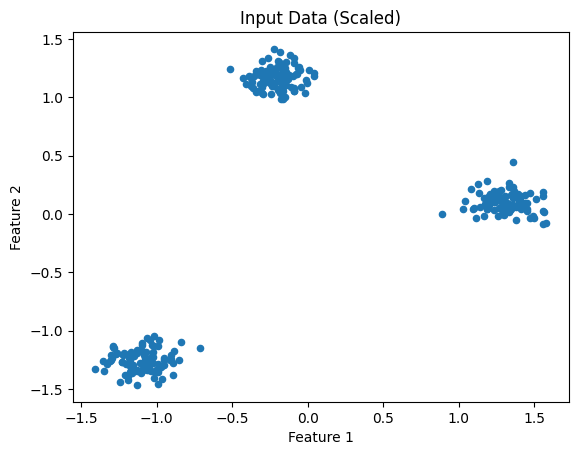

In [14]:
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title("Input Data (Scaled)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Step 5: Epsilon (ε) Selection using k-Distance Graph

Procedure:
1. Choose `k = min_samples`
2. Compute distance to the k-th nearest neighbor
3. Sort distances
4. Find the **elbow**

Interpretation:
- ε too small → most points become noise
- ε too large → clusters merge
- No elbow → DBSCAN is not suitable


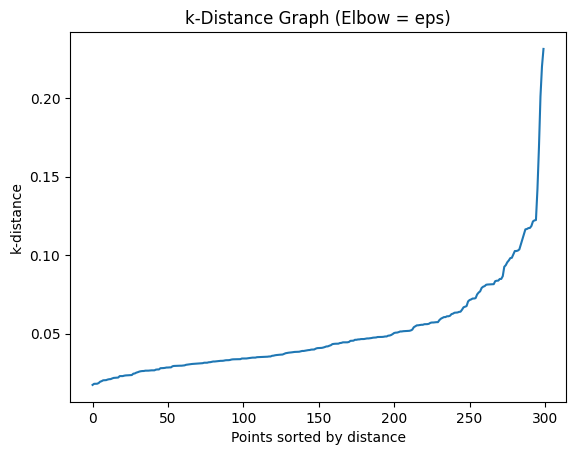

In [15]:
k = 5  # same as min_samples

nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X)

distances, _ = nbrs.kneighbors(X)

k_distances = np.sort(distances[:, k - 1])

plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("k-distance")
plt.title("k-Distance Graph (Elbow = eps)")
plt.show()


## Step 6: Apply DBSCAN

Parameters:
- `eps` → chosen from k-distance graph
- `min_samples` → density threshold

`fit_predict()`:
- fits the model
- assigns cluster labels
- noise points get label `-1`


In [16]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)


## Step 7: Visualize DBSCAN Clusters

Color meaning:
- Same color → density-connected points
- `-1` → noise (outliers)


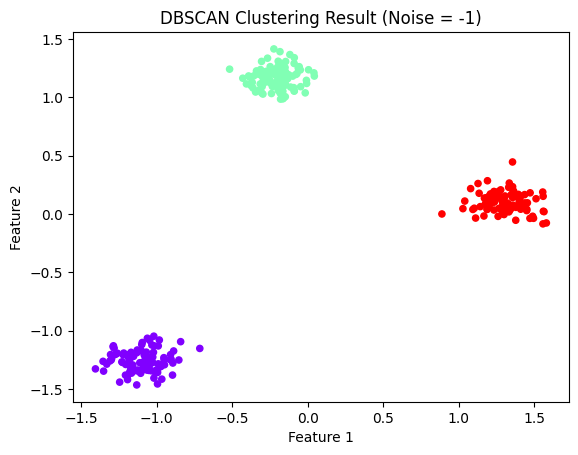

In [17]:
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    cmap="rainbow",
    s=20
)
plt.title("DBSCAN Clustering Result (Noise = -1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Step 8: Count Clusters and Noise Points

DBSCAN automatically decides:
- number of clusters
- number of noise points

Logic:
- unique labels except `-1` → clusters
- count of `-1` → noise


In [18]:
unique_labels = set(labels)

n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(labels).count(-1)

print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)


Number of clusters: 3
Number of noise points: 0


## Step 9: Identify Core, Border, and Noise Points

Definitions:
- **Core** → has ≥ min_samples neighbors within ε
- **Border** → inside ε of a core point
- **Noise** → not reachable from any core point

Only **core points** can expand clusters.


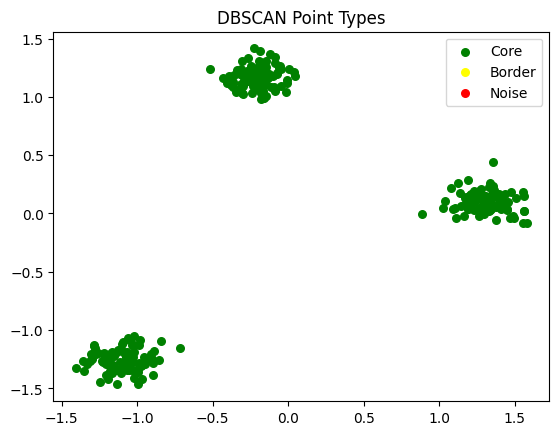

In [19]:
core_mask = np.zeros_like(labels, dtype=bool)
core_mask[dbscan.core_sample_indices_] = True

plt.scatter(X[core_mask, 0], X[core_mask, 1],
            c="green", s=30, label="Core")

plt.scatter(X[~core_mask & (labels != -1), 0],
            X[~core_mask & (labels != -1), 1],
            c="yellow", s=30, label="Border")

plt.scatter(X[labels == -1, 0],
            X[labels == -1, 1],
            c="red", s=30, label="Noise")

plt.legend()
plt.title("DBSCAN Point Types")
plt.show()


## Step 10: Epsilon Sensitivity Analysis

Purpose:
- Check robustness of clustering
- Stable clusters across ε → good DBSCAN fit
- Large changes → DBSCAN unsuitable


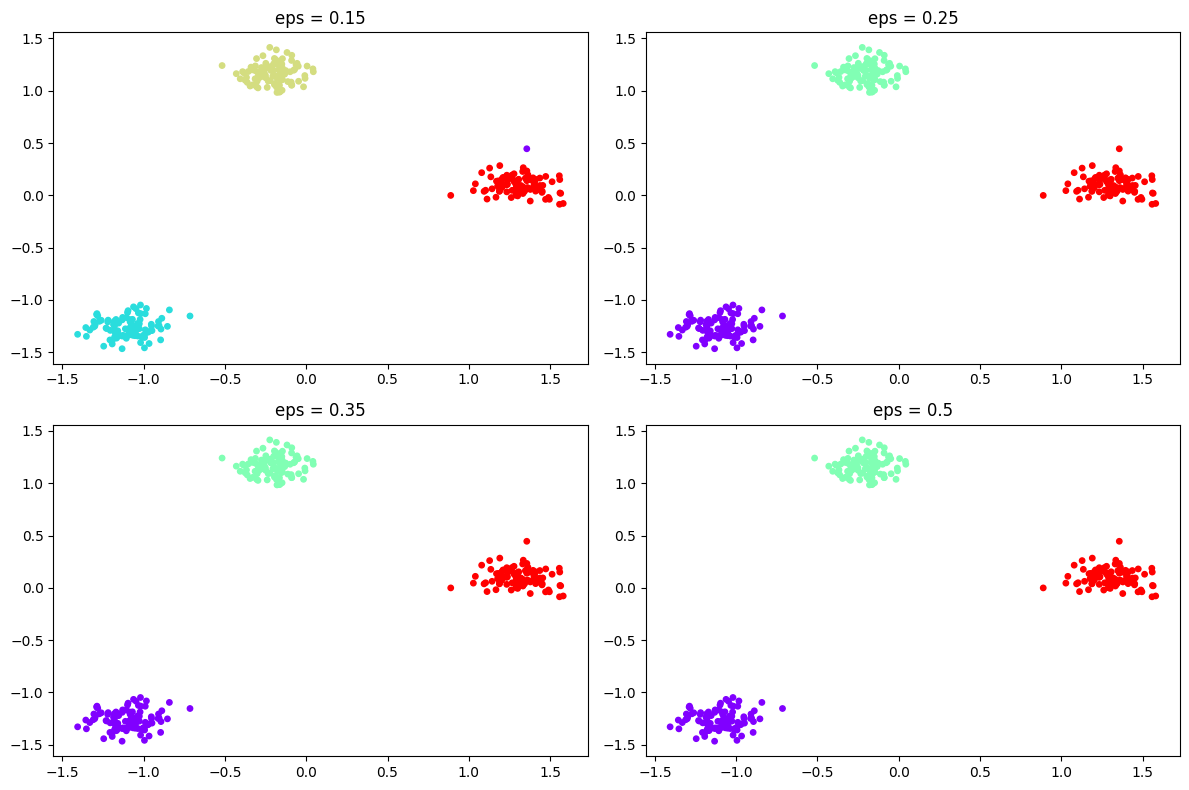

In [20]:
eps_values = [0.15, 0.25, 0.35, 0.5]

plt.figure(figsize=(12, 8))

for i, eps in enumerate(eps_values, 1):
    db = DBSCAN(eps=eps, min_samples=5)
    lbls = db.fit_predict(X)

    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=lbls, cmap="rainbow", s=15)
    plt.title(f"eps = {eps}")

plt.tight_layout()
plt.show()
